(699, 1)
(699, 1)


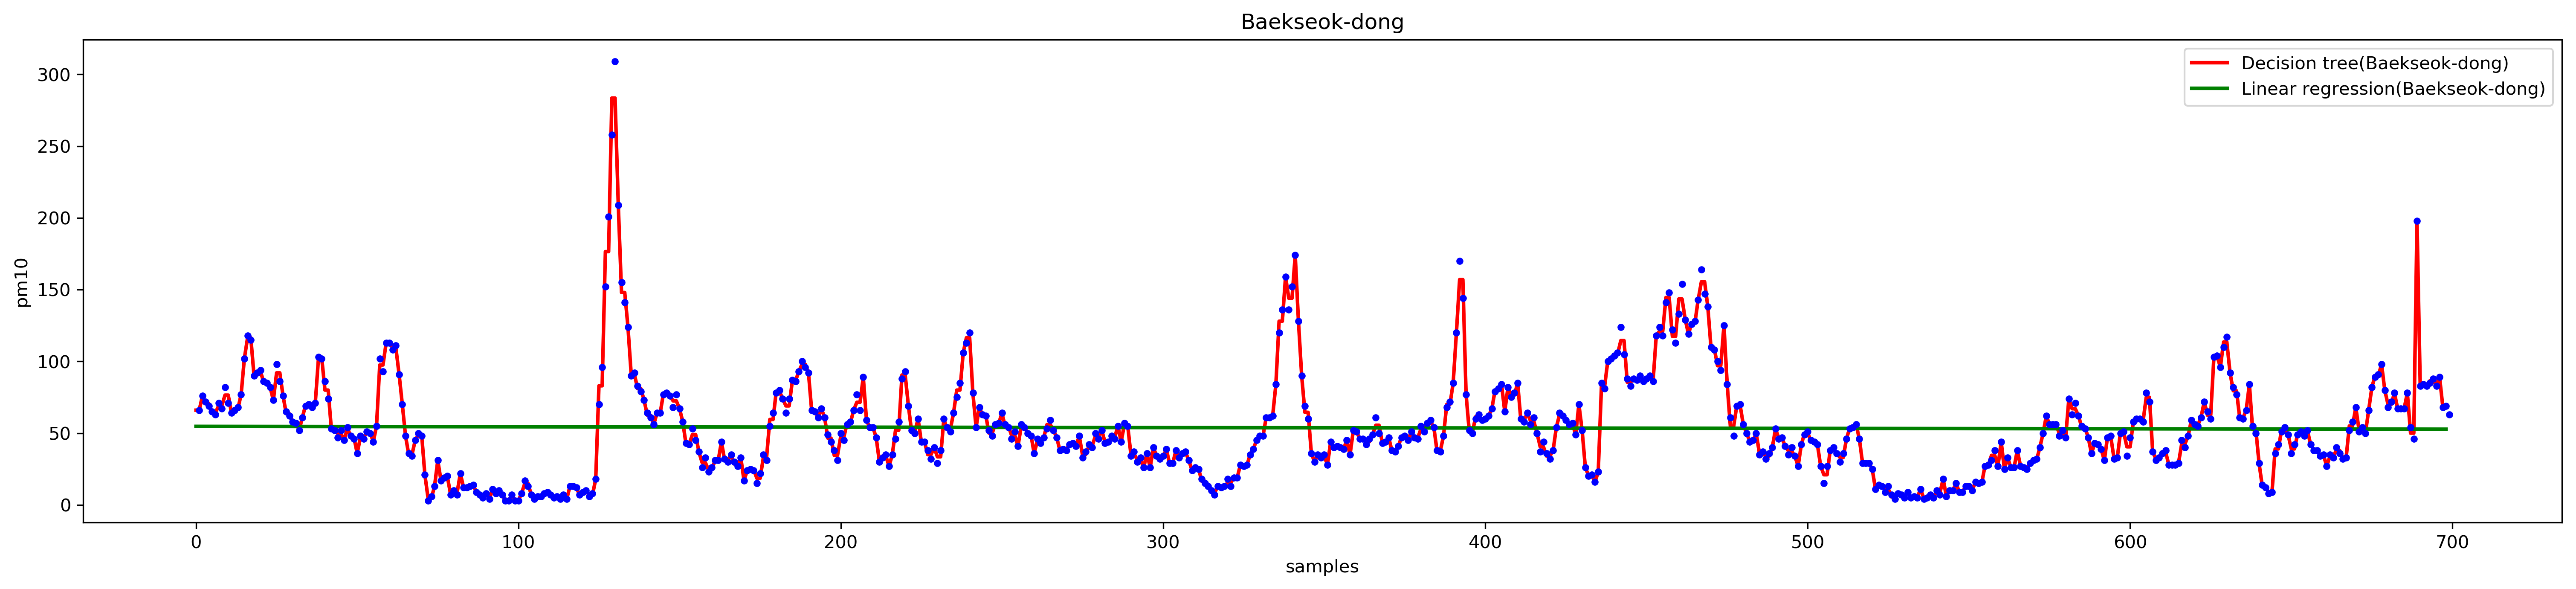

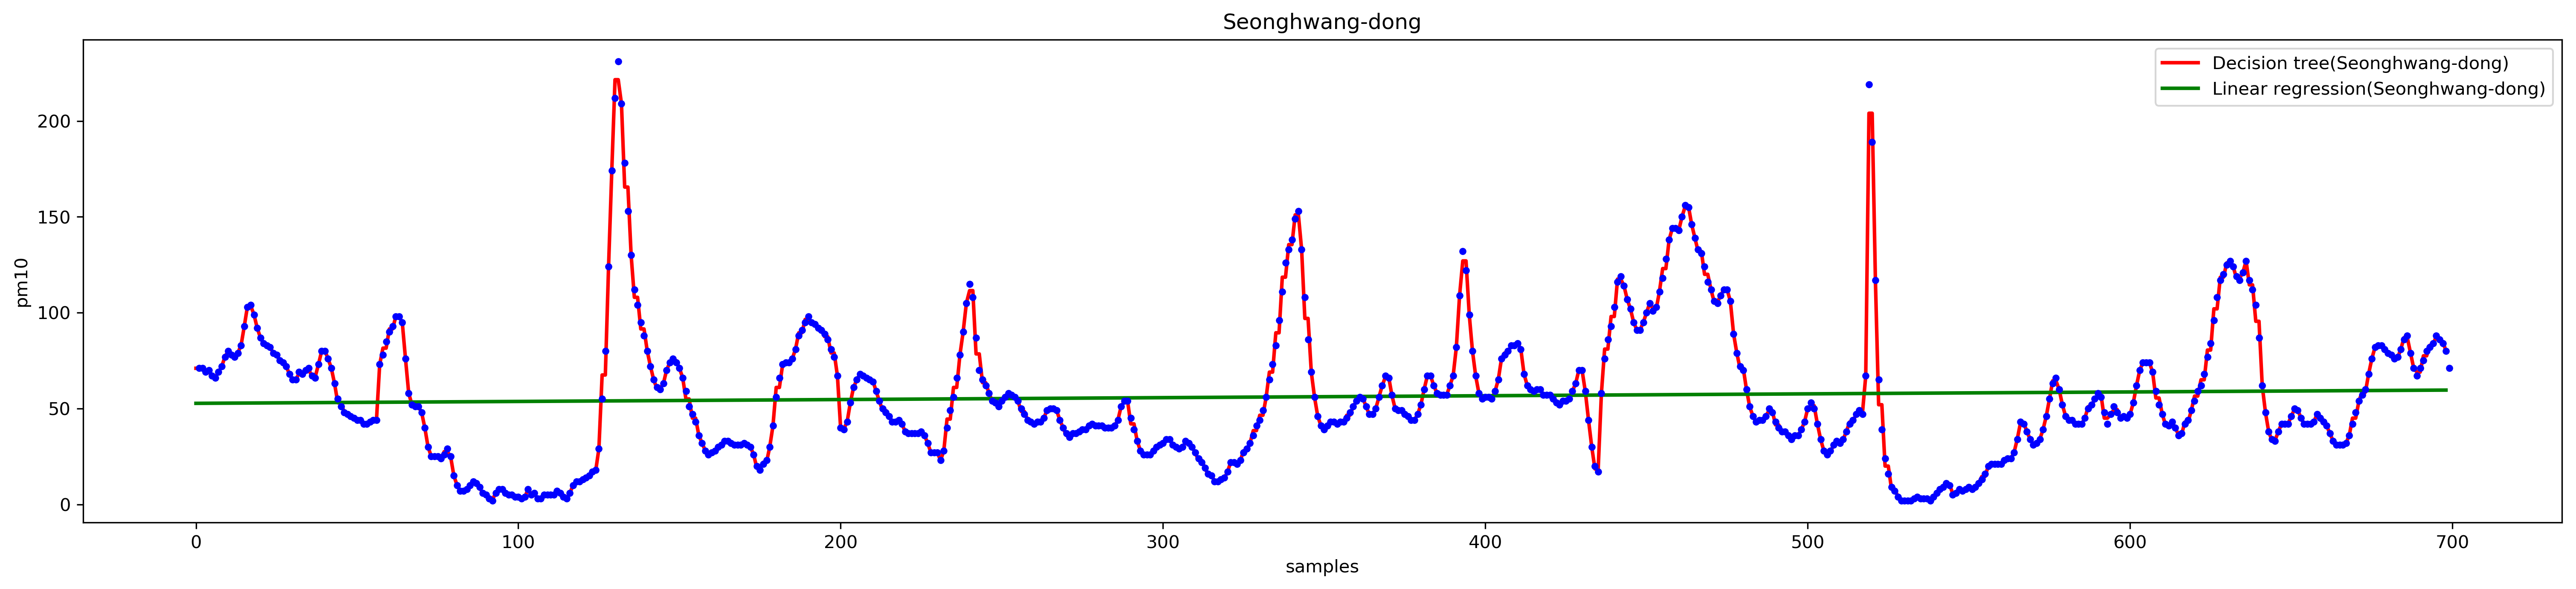

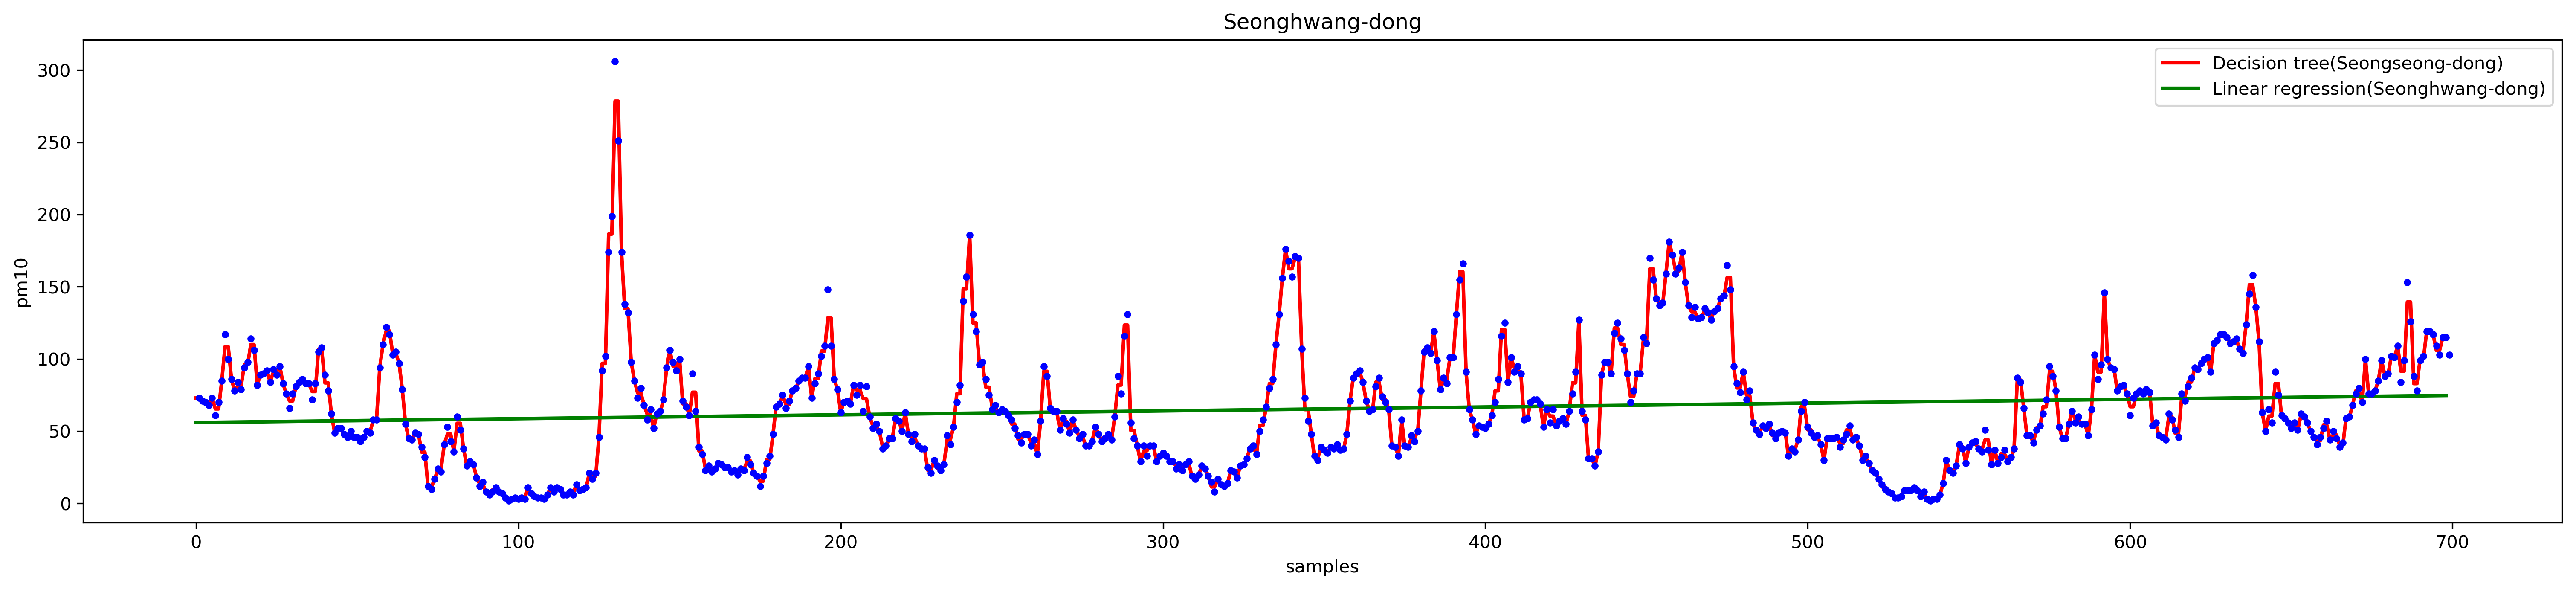

In [1]:
%matplotlib inline
from preamble import *

import os
import mglearn
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import matplotlib.pyplot as plt3
# The file has no headers naming the columns, so we pass header=None
# and provide the column names explicitly in "names"
dust_data_path = os.path.join(mglearn.datasets.DATA_PATH, "Cheonan_dust_pm10.csv")

rootData = pd.read_csv(
    dust_data_path, 
    
    index_col=False,
    #names=['time', 'pm10', 'pm2.5']
)

data = pd.read_csv(
    dust_data_path, 
    
    index_col=False,
    #names=['time', 'pm10', 'pm2.5']
)

data2 = pd.read_csv(
    dust_data_path, 
    
    index_col=False,
    #names=['time', 'pm10', 'pm2.5']
)

rootData = rootData[['date', 'bs', 'sh', 'ss']]
rootData = rootData.dropna()

# For illustration purposes, we only select some of the columns:
data = data[['date', 'bs']]
data2 = pd.DataFrame(data2[['date', 'bs']])

# IPython.display allows nice output formatting within the Jupyter notebook

#display(data.head())

data = data.dropna()
data2 = data2.dropna()

a = rootData['date']

a = np.array(rootData['date'],)

for i in range(a.size):
    a[i] = i+1.0
    
b = np.array(rootData['bs'],)
c = np.array(rootData['sh'],) #성황동
d = np.array(rootData['ss'],) #성성동

X, y = rootData['date'], rootData['bs']

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

#print(a)
#print(a.size)
aT = np.reshape(a, (a.size, 1))
#print(aT)

b = np.array(rootData['bs'],)
c = np.array(rootData['sh'],) #성황동
d = np.array(rootData['ss'],) #성성동

#print(b)

plt.figure(figsize=(25, 5))

line = np.linspace(0, 699, 699, endpoint=False).reshape(-1, 1)
#print(line.shape)

reg = DecisionTreeRegressor(min_samples_split=3).fit(aT, b)
plt.plot(line, reg.predict(line), label="Decision tree(Baekseok-dong)", c='r')

#reg2 = DecisionTreeRegressor(min_samples_split=3).fit(aT, c)
#plt.plot(line, reg2.predict(line), label="Decision tree(Seonghwang-dong)", c='b')

#reg3 = DecisionTreeRegressor(min_samples_split=3).fit(aT, d)
#plt.plot(line, reg3.predict(line), label="Decision tree(Seongseong-dong)", c='g')

reg = LinearRegression().fit(aT, b)
plt.plot(line, reg.predict(line), label="Linear regression(Baekseok-dong)", c='g')




plt.plot(aT, b, '.', c='b')
#plt.plot(aT, c, '.', c='k')
#plt.plot(aT, d, '.', c='k')
#plt.xticks(rotation=90)
plt.ylabel("pm10")
plt.xlabel("samples")
plt.legend(loc="best")
plt.title("Baekseok-dong")

plt2.figure(figsize=(25, 5))

line = np.linspace(0, 699, 699, endpoint=False).reshape(-1, 1)
print(line.shape)

reg2 = DecisionTreeRegressor(min_samples_split=3).fit(aT, c)
plt2.plot(line, reg2.predict(line), label="Decision tree(Seonghwang-dong)", c='r')

reg2 = LinearRegression().fit(aT, c)
plt2.plot(line, reg2.predict(line), label="Linear regression(Seonghwang-dong)", c='g')

plt2.plot(aT, c, '.', c='b')
#plt.xticks(rotation=90)
plt2.ylabel("pm10")
plt2.xlabel("samples")
plt2.legend(loc="best")
plt2.title("Seonghwang-dong")


plt3.figure(figsize=(25, 5))

line = np.linspace(0, 699, 699, endpoint=False).reshape(-1, 1)
print(line.shape)

reg3 = DecisionTreeRegressor(min_samples_split=3).fit(aT, d)
plt3.plot(line, reg3.predict(line), label="Decision tree(Seongseong-dong)", c='r')

reg3 = LinearRegression().fit(aT, d)
plt3.plot(line, reg3.predict(line), label="Linear regression(Seonghwang-dong)", c='g')

plt3.plot(aT, d, '.', c='b')
#plt.xticks(rotation=90)
plt3.ylabel("pm10")
plt3.xlabel("samples")
plt3.title("Seonghwang-dong")
plt3.legend(loc="best")





# ----------------------------------------------

Text(0.5,0,'Input feature')

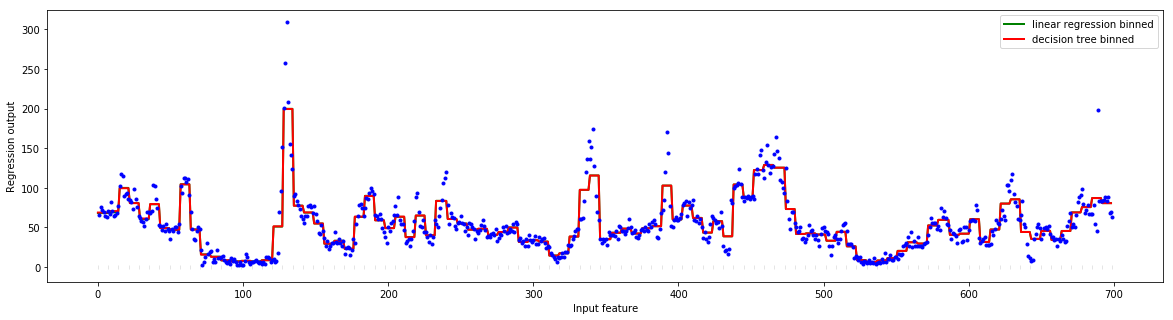

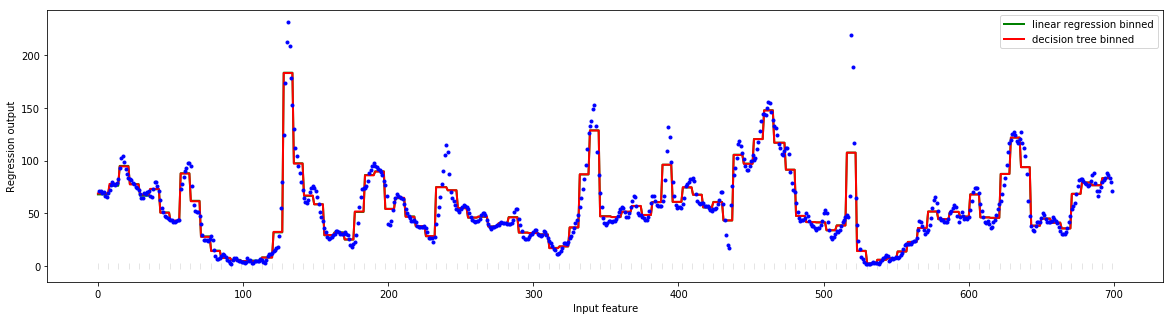

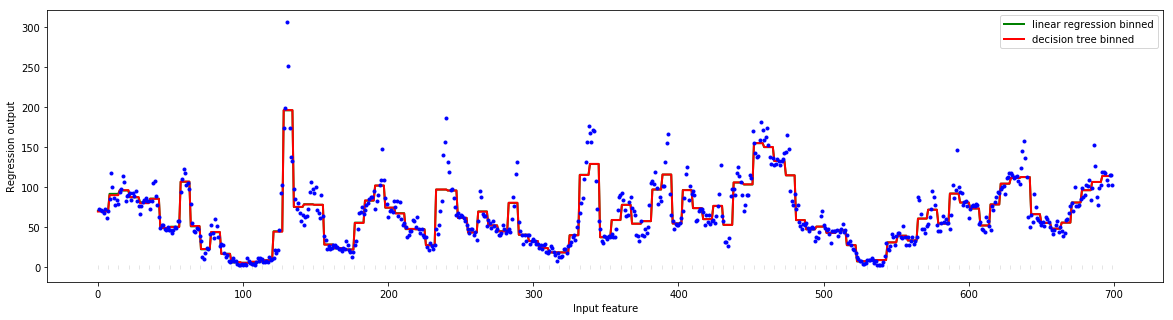

In [2]:
bins = np.linspace(0, 699, 100)

aT = np.array(aT,dtype='float64')
which_bin = np.digitize(aT, bins=bins)

from sklearn.preprocessing import OneHotEncoder

# transform using the OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)




encoder = OneHotEncoder(sparse=False)
which_bin = np.digitize(aT, bins=bins)
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)

line = np.linspace(0, 699, 699, endpoint=False).reshape(-1, 1)
line_binned = encoder.transform(np.digitize(line, bins=bins))

plt.figure(figsize=(20, 5))

reg = LinearRegression().fit(X_binned, b)
plt.plot(line, reg.predict(line_binned), label='linear regression binned', c='g')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, b)
plt.plot(line, reg.predict(line_binned), label='decision tree binned', c='r')

plt.plot(aT[:, 0], b, '.', c='b')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.1)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")



plt2.figure(figsize=(20, 5))

reg2 = LinearRegression().fit(X_binned, c)
plt2.plot(line, reg2.predict(line_binned), label='linear regression binned', c='g')

reg2 = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, c)
plt2.plot(line, reg2.predict(line_binned), label='decision tree binned', c='r')

plt2.plot(aT[:, 0], c, '.', c='b')
plt2.vlines(bins, -3, 3, linewidth=1, alpha=.1)
plt2.legend(loc="best")
plt2.ylabel("Regression output")
plt2.xlabel("Input feature")



plt3.figure(figsize=(20, 5))

reg3 = LinearRegression().fit(X_binned, d)
plt3.plot(line, reg3.predict(line_binned), label='linear regression binned', c='g')

reg3 = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, d)
plt3.plot(line, reg3.predict(line_binned), label='decision tree binned', c='r')

plt3.plot(aT[:, 0], d, '.', c='b')
plt3.vlines(bins, -3, 3, linewidth=1, alpha=.1)
plt3.legend(loc="best")
plt3.ylabel("Regression output")
plt3.xlabel("Input feature")

# ------------------------------------


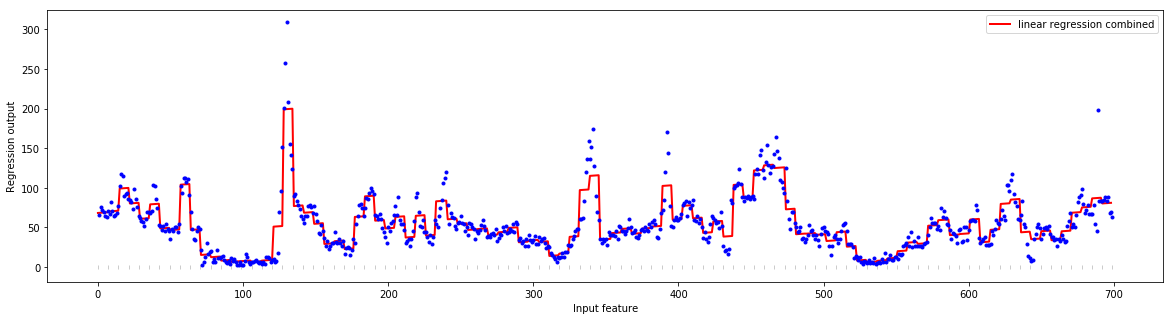

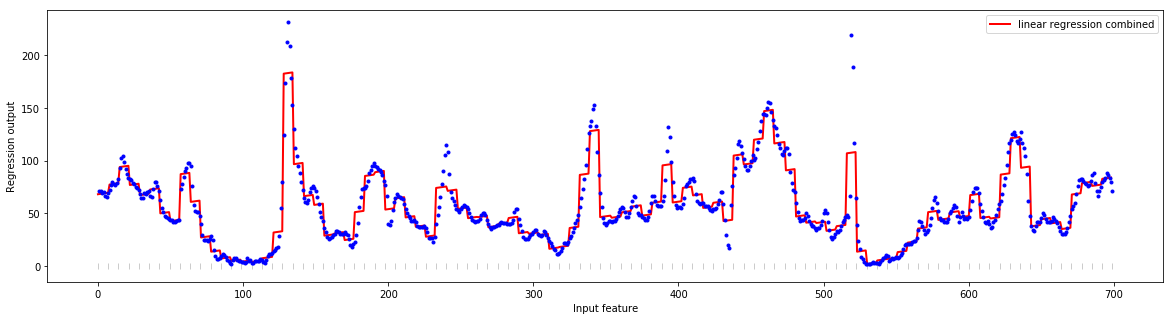

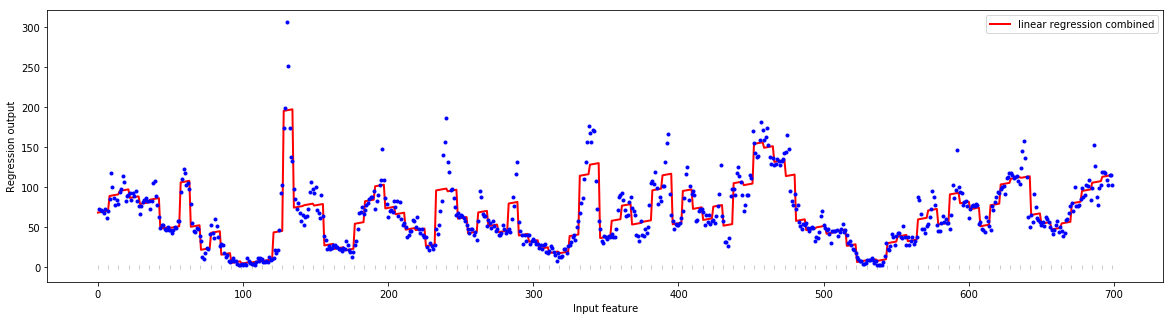

In [3]:
X_combined = np.hstack([aT, X_binned])


plt.figure(figsize=(20, 5))

reg = LinearRegression().fit(X_combined, b)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined', c='r')

plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)

plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(aT[:, 0], b, '.', c='b')



plt2.figure(figsize=(20, 5))

reg2 = LinearRegression().fit(X_combined, c)
line_combined = np.hstack([line, line_binned])
plt2.plot(line, reg2.predict(line_combined), label='linear regression combined', c='r')

plt2.vlines(bins, -3, 3, linewidth=1, alpha=.2)

plt2.legend(loc="best")
plt2.ylabel("Regression output")
plt2.xlabel("Input feature")
plt2.plot(aT[:, 0], c, '.', c='b')



plt3.figure(figsize=(20, 5))

reg3 = LinearRegression().fit(X_combined, d)
line_combined = np.hstack([line, line_binned])
plt3.plot(line, reg3.predict(line_combined), label='linear regression combined', c='r')

plt3.vlines(bins, -3, 3, linewidth=1, alpha=.2)

plt3.legend(loc="best")
plt3.ylabel("Regression output")
plt3.xlabel("Input feature")
plt3.plot(aT[:, 0], d, '.', c='b')

# ----------------------------------


[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0. 252.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 

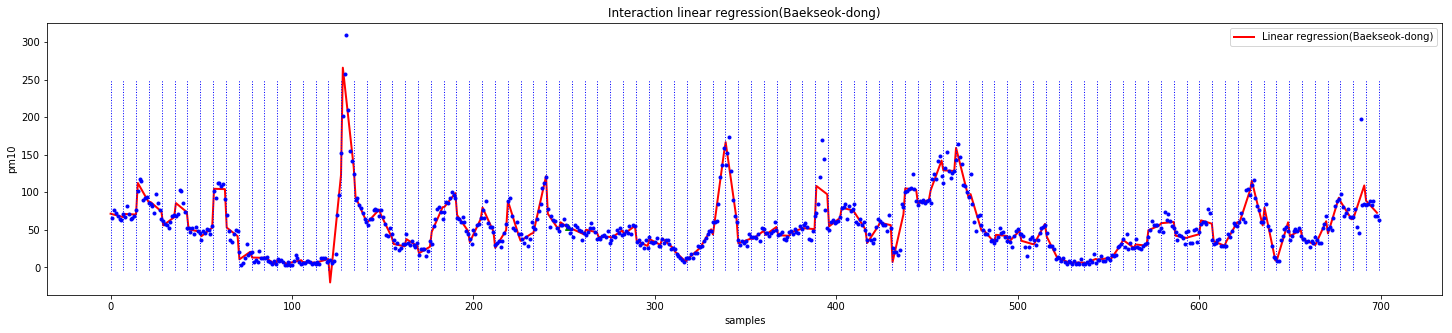

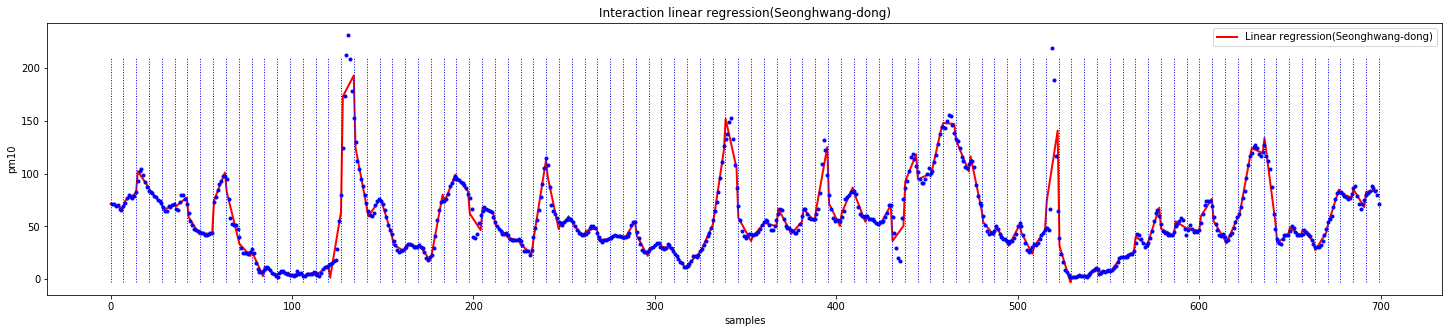

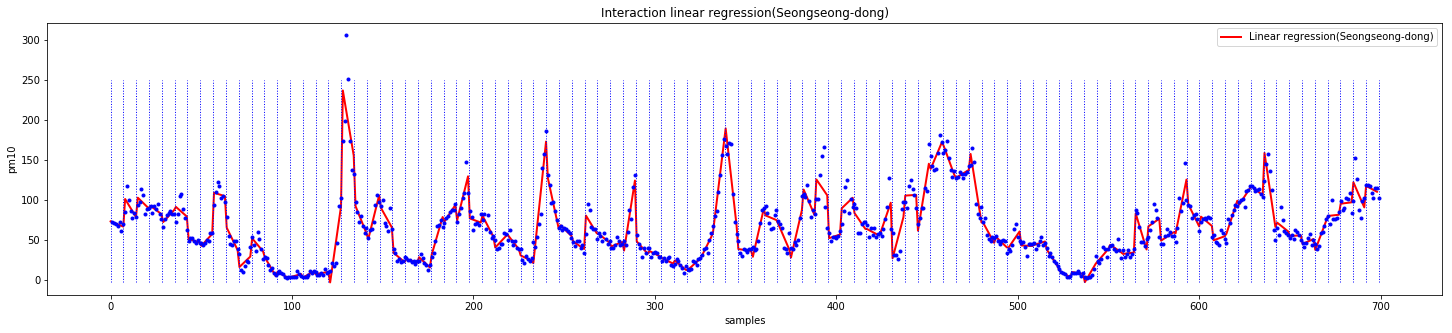

In [4]:
X_product = np.hstack([X_binned, aT * X_binned])


plt.figure(figsize=(25, 5))

reg = LinearRegression().fit(X_product, b)
line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='Linear regression(Baekseok-dong)', c='r')

for bin in bins:
    plt.plot([bin, bin], [-3, 250], ':', c='b', linewidth=1)
    
print(X_product[251], b[251])
plt.plot(aT[251],b[251], '^', c='g')

for i in range(699):
    if b[i] == 54.0:
        print(i)
    
plt.plot(aT[:, 0], b, '.', c='b')
plt.ylabel("pm10")
plt.xlabel("samples")
plt.title("Interaction linear regression(Baekseok-dong)")
plt.legend(loc="best")




plt2.figure(figsize=(25, 5))

reg2 = LinearRegression().fit(X_product, c)
line_product = np.hstack([line_binned, line * line_binned])
plt2.plot(line, reg2.predict(line_product), label='Linear regression(Seonghwang-dong)', c='r')

for bin in bins:
    plt2.plot([bin, bin], [-3, 210], ':', c='b', linewidth=1)
    
print(X_product[251], c[251])
plt.plot(aT[251],c[251], '^', c='g')

for i in range(699):
    if c[i] == 58.0:
        print(i)
        
    
plt2.plot(aT[:, 0], c, '.', c='b')
plt2.ylabel("pm10")
plt2.xlabel("samples")
plt2.title("Interaction linear regression(Seonghwang-dong)")
plt2.legend(loc="best")




plt3.figure(figsize=(25, 5))

reg3 = LinearRegression().fit(X_product, d)
line_product = np.hstack([line_binned, line * line_binned])
plt3.plot(line, reg3.predict(line_product), label='Linear regression(Seongseong-dong)', c='r')

for bin in bins:
    plt3.plot([bin, bin], [-3, 250], ':', c='b', linewidth=1)
    
    
    
plt3.plot(aT[:, 0], d, '.', c='b')
plt3.ylabel("pm10")
plt3.xlabel("samples")
plt3.title("Interaction linear regression(Seongseong-dong)")
plt3.legend(loc="best")

X.shape: (699, 1)
X_poly.shape: (699, 11)
Entries of X:
[[1.]
 [2.]
 [3.]
 [4.]
 [5.]]
Entries of X_poly:
[[      1.       1.       1.       1.       1.       1.       1.       1.
        1.       1.       1.]
 [      1.       2.       4.       8.      16.      32.      64.     128.
      256.     512.    1024.]
 [      1.       3.       9.      27.      81.     243.     729.    2187.
     6561.   19683.   59049.]
 [      1.       4.      16.      64.     256.    1024.    4096.   16384.
    65536.  262144. 1048576.]
 [      1.       5.      25.     125.     625.    3125.   15625.   78125.
   390625. 1953125. 9765625.]]
Polynomial feature names:
['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


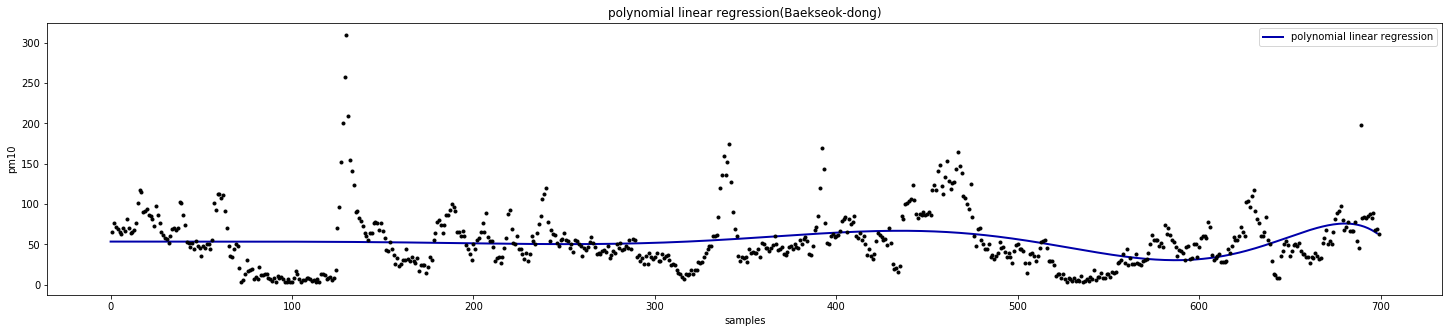

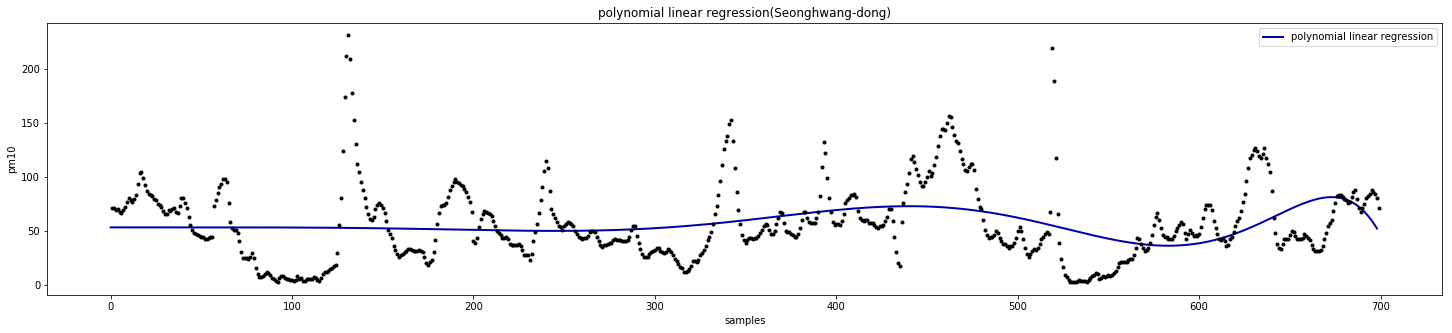

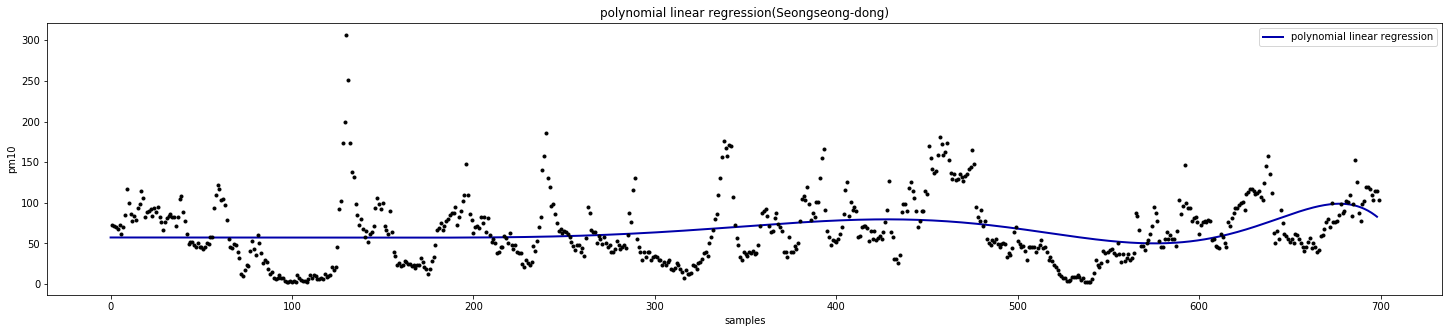

In [5]:
from sklearn.preprocessing import PolynomialFeatures

# include polynomials up to x ** 10:
# the default "include_bias=True" adds a feature that's constantly 1
poly = PolynomialFeatures(degree=10, )
poly.fit(aT)
X_poly = poly.transform(aT)

print("X.shape: {}".format(aT.shape))
print("X_poly.shape: {}".format(X_poly.shape))

print("Entries of X:\n{}".format(aT[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))

print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

plt.figure(figsize=(25, 5))

reg = LinearRegression().fit(X_poly, b)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(aT[:, 0], b, '.', c='k')
plt.ylabel("pm10")
plt.xlabel("samples")
plt.title("polynomial linear regression(Baekseok-dong)")
plt.legend(loc="best")



poly = PolynomialFeatures(degree=10, )
poly.fit(aT)
X_poly = poly.transform(aT)

plt2.figure(figsize=(25, 5))

reg = LinearRegression().fit(X_poly, c)

line_poly = poly.transform(line)
plt2.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt2.plot(aT[:, 0], c, '.', c='k')
plt2.ylabel("pm10")
plt2.xlabel("samples")
plt2.title("polynomial linear regression(Seonghwang-dong)")
plt2.legend(loc="best")



poly = PolynomialFeatures(degree=10, )
poly.fit(aT)
X_poly = poly.transform(aT)

plt3.figure(figsize=(25, 5))

reg = LinearRegression().fit(X_poly, d)

line_poly = poly.transform(line)
plt3.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt3.plot(aT[:, 0], d, '.', c='k')
plt3.ylabel("pm10")
plt3.xlabel("samples")
plt3.title("polynomial linear regression(Seongseong-dong)")
plt3.legend(loc="best")

### 4월 4주차

(1000, 1)
(1000, 1)
186


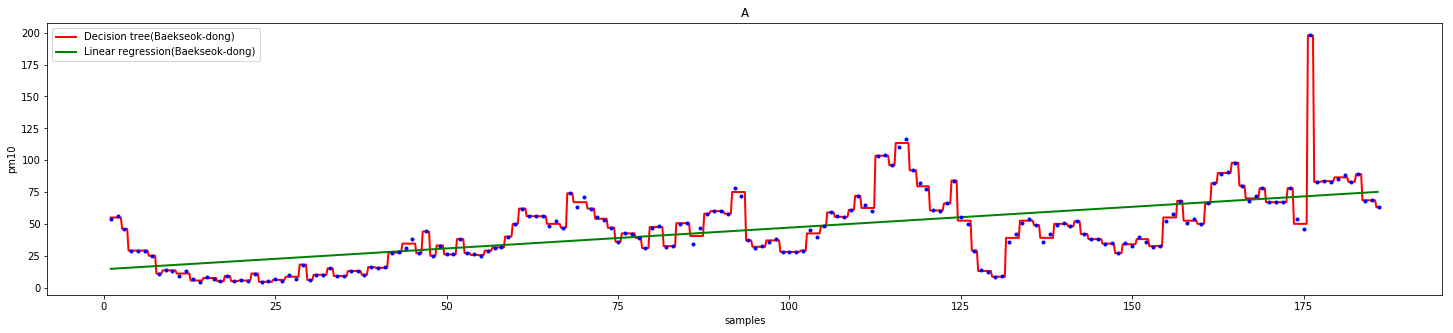

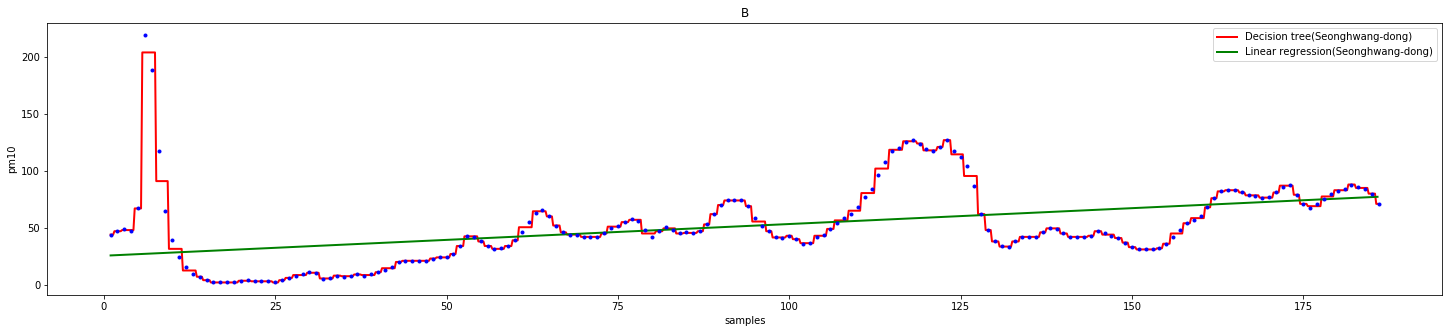

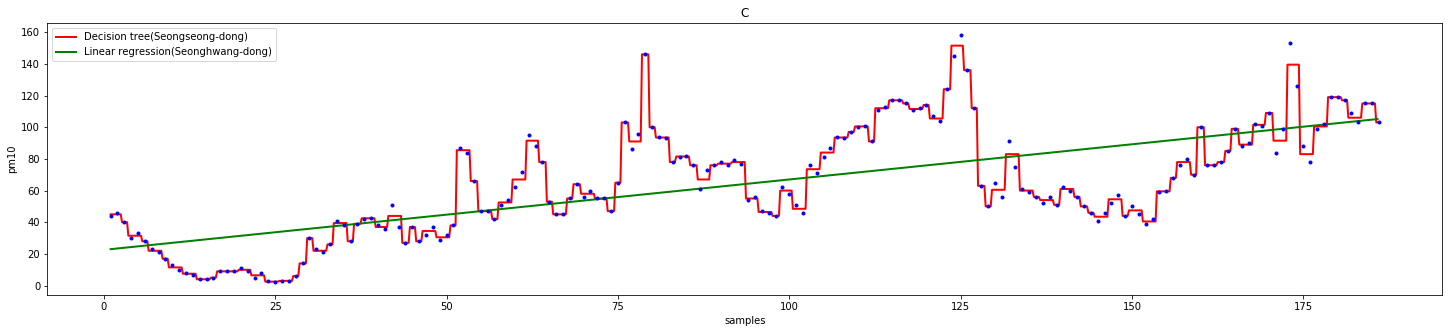

In [6]:
%matplotlib inline
from preamble import *

import os
import mglearn
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import matplotlib.pyplot as plt3
# The file has no headers naming the columns, so we pass header=None
# and provide the column names explicitly in "names"
dust_data_path = os.path.join(mglearn.datasets.DATA_PATH, "Cheonan_dust_pm10_4th.csv")

rootData = pd.read_csv(
    dust_data_path, 
    
    index_col=False,
    #names=['time', 'pm10', 'pm2.5']
)

data = pd.read_csv(
    dust_data_path, 
    
    index_col=False,
    #names=['time', 'pm10', 'pm2.5']
)

data2 = pd.read_csv(
    dust_data_path, 
    
    index_col=False,
    #names=['time', 'pm10', 'pm2.5']
)

rootData = rootData[['date', 'bs', 'sh', 'ss']]
rootData = rootData.dropna()

# For illustration purposes, we only select some of the columns:
data = data[['date', 'bs']]
data2 = pd.DataFrame(data2[['date', 'bs']])

# IPython.display allows nice output formatting within the Jupyter notebook

#display(data.head())

data = data.dropna()
data2 = data2.dropna()

a = rootData['date']

a = np.array(rootData['date'],)

for i in range(a.size):
    a[i] = i+1.0
    
b = np.array(rootData['bs'],)
c = np.array(rootData['sh'],) #성황동
d = np.array(rootData['ss'],) #성성동

X, y = rootData['date'], rootData['bs']

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

#print(a)
#print(a.size)
aT = np.reshape(a, (a.size, 1))
#print(aT)

b = np.array(rootData['bs'],)
c = np.array(rootData['sh'],) #성황동
d = np.array(rootData['ss'],) #성성동

#print(b)

plt.figure(figsize=(25, 5))

line = np.linspace(1, 186, 1000, endpoint=False).reshape(-1, 1)
#print(line.shape)

reg = DecisionTreeRegressor(min_samples_split=3).fit(aT, b)
plt.plot(line, reg.predict(line), label="Decision tree(Baekseok-dong)", c='r')

#reg2 = DecisionTreeRegressor(min_samples_split=3).fit(aT, c)
#plt.plot(line, reg2.predict(line), label="Decision tree(Seonghwang-dong)", c='b')

#reg3 = DecisionTreeRegressor(min_samples_split=3).fit(aT, d)
#plt.plot(line, reg3.predict(line), label="Decision tree(Seongseong-dong)", c='g')

reg = LinearRegression().fit(aT, b)
plt.plot(line, reg.predict(line), label="Linear regression(Baekseok-dong)", c='g')




plt.plot(aT, b, '.', c='b')
#plt.plot(aT, c, '.', c='k')
#plt.plot(aT, d, '.', c='k')
#plt.xticks(rotation=90)
plt.ylabel("pm10")
plt.xlabel("samples")
plt.legend(loc="best")
plt.title("A")

plt2.figure(figsize=(25, 5))

line = np.linspace(1, 186, 1000, endpoint=False).reshape(-1, 1)
print(line.shape)

reg2 = DecisionTreeRegressor(min_samples_split=3).fit(aT, c)
plt2.plot(line, reg2.predict(line), label="Decision tree(Seonghwang-dong)", c='r')

reg2 = LinearRegression().fit(aT, c)
plt2.plot(line, reg2.predict(line), label="Linear regression(Seonghwang-dong)", c='g')

plt2.plot(aT, c, '.', c='b')
#plt.xticks(rotation=90)
plt2.ylabel("pm10")
plt2.xlabel("samples")
plt2.legend(loc="best")
plt2.title("B")


plt3.figure(figsize=(25, 5))

line = np.linspace(1, 186, 1000, endpoint=False).reshape(-1, 1)
print(line.shape)

reg3 = DecisionTreeRegressor(min_samples_split=3).fit(aT, d)
plt3.plot(line, reg3.predict(line), label="Decision tree(Seongseong-dong)", c='r')

reg3 = LinearRegression().fit(aT, d)
plt3.plot(line, reg3.predict(line), label="Linear regression(Seonghwang-dong)", c='g')

plt3.plot(aT, d, '.', c='b')
#plt.xticks(rotation=90)
plt3.ylabel("pm10")
plt3.xlabel("samples")
plt3.title("C")
plt3.legend(loc="best")



print(aT.size)

Text(0.5,0,'Input feature')

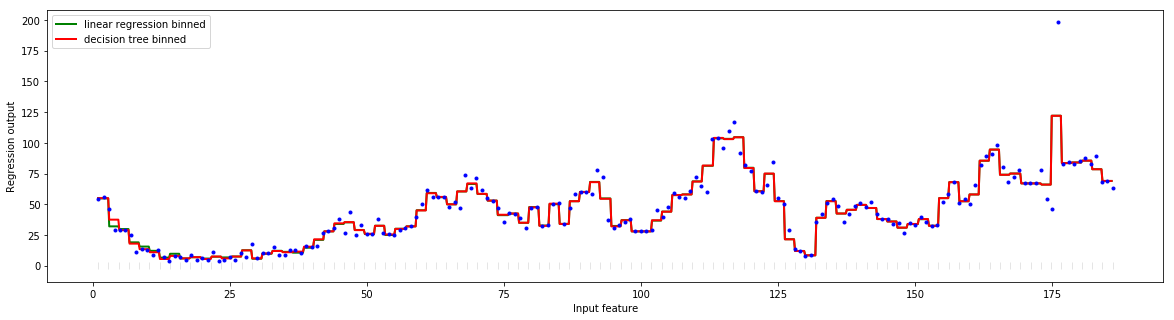

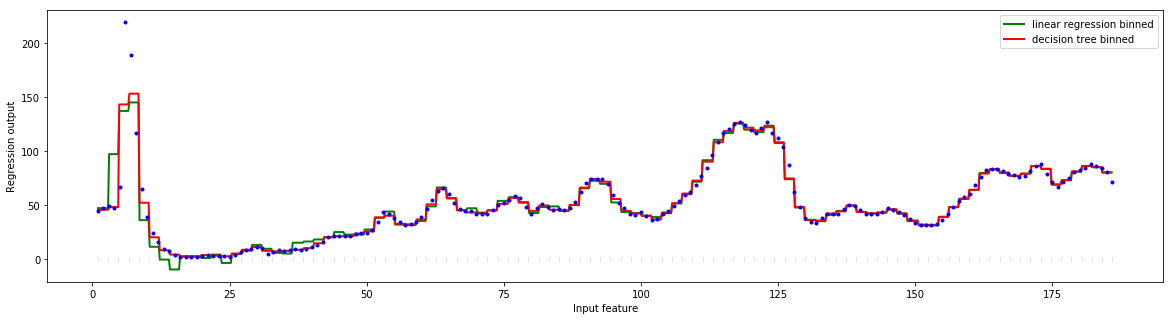

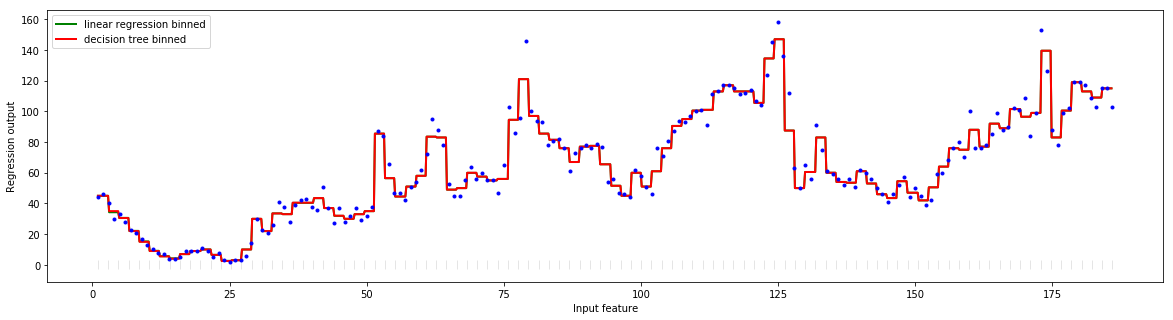

In [7]:
bins = np.linspace(1, 186, 100)

aT = np.array(aT,dtype='float64')
which_bin = np.digitize(aT, bins=bins)

from sklearn.preprocessing import OneHotEncoder

# transform using the OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)




encoder = OneHotEncoder(sparse=False)
which_bin = np.digitize(aT, bins=bins)
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)

line = np.linspace(1, 186, 1000, endpoint=False).reshape(-1, 1)
line_binned = encoder.transform(np.digitize(line, bins=bins))

plt.figure(figsize=(20, 5))

reg = LinearRegression().fit(X_binned, b)
plt.plot(line, reg.predict(line_binned), label='linear regression binned', c='g')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, b)
plt.plot(line, reg.predict(line_binned), label='decision tree binned', c='r')

plt.plot(aT[:, 0], b, '.', c='b')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.1)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")



plt2.figure(figsize=(20, 5))

reg2 = LinearRegression().fit(X_binned, c)
plt2.plot(line, reg2.predict(line_binned), label='linear regression binned', c='g')

reg2 = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, c)
plt2.plot(line, reg2.predict(line_binned), label='decision tree binned', c='r')

plt2.plot(aT[:, 0], c, '.', c='b')
plt2.vlines(bins, -3, 3, linewidth=1, alpha=.1)
plt2.legend(loc="best")
plt2.ylabel("Regression output")
plt2.xlabel("Input feature")



plt3.figure(figsize=(20, 5))

reg3 = LinearRegression().fit(X_binned, d)
plt3.plot(line, reg3.predict(line_binned), label='linear regression binned', c='g')

reg3 = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, d)
plt3.plot(line, reg3.predict(line_binned), label='decision tree binned', c='r')

plt3.plot(aT[:, 0], d, '.', c='b')
plt3.vlines(bins, -3, 3, linewidth=1, alpha=.1)
plt3.legend(loc="best")
plt3.ylabel("Regression output")
plt3.xlabel("Input feature")

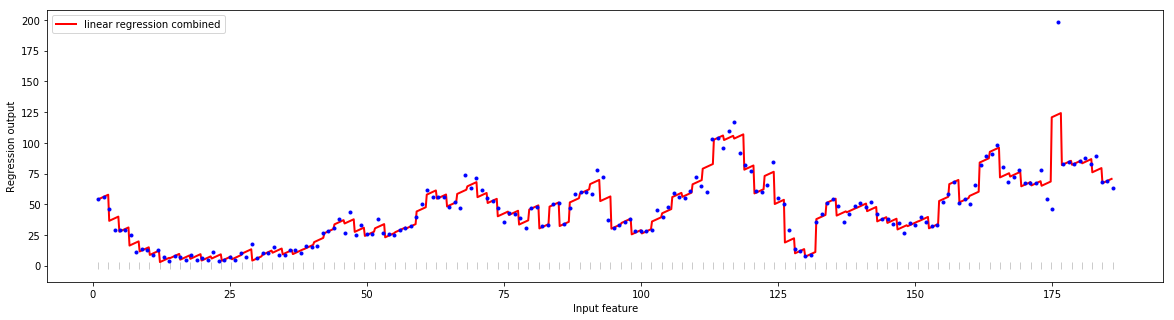

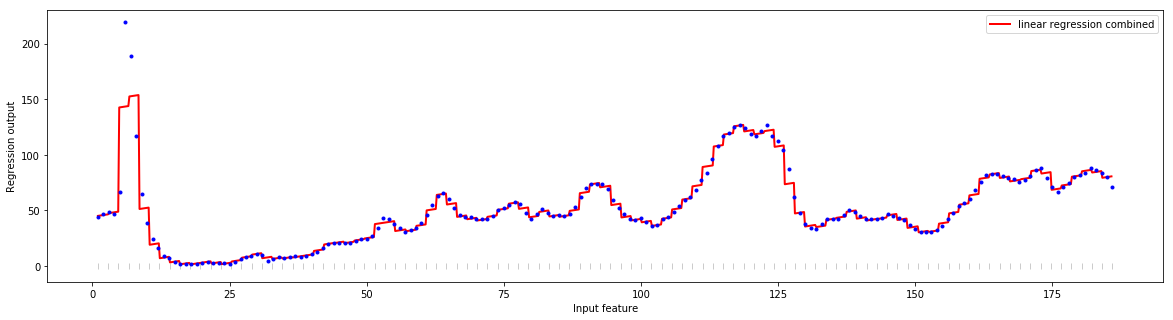

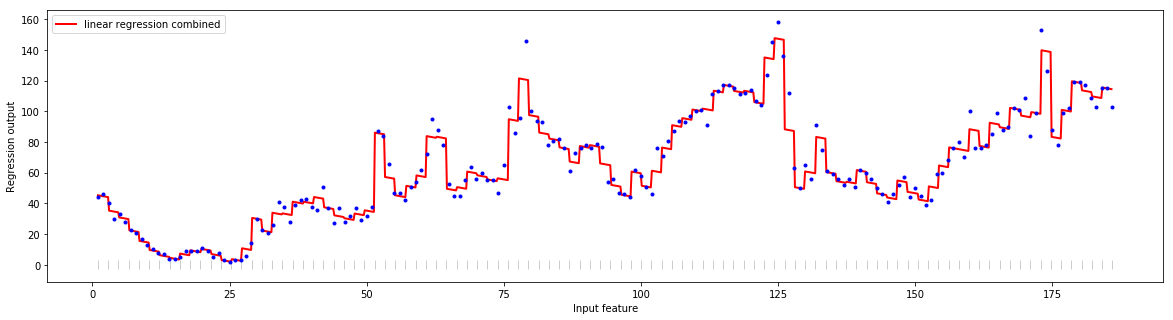

In [8]:
X_combined = np.hstack([aT, X_binned])


plt.figure(figsize=(20, 5))

reg = LinearRegression().fit(X_combined, b)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined', c='r')

plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)

plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(aT[:, 0], b, '.', c='b')



plt2.figure(figsize=(20, 5))

reg2 = LinearRegression().fit(X_combined, c)
line_combined = np.hstack([line, line_binned])
plt2.plot(line, reg2.predict(line_combined), label='linear regression combined', c='r')

plt2.vlines(bins, -3, 3, linewidth=1, alpha=.2)

plt2.legend(loc="best")
plt2.ylabel("Regression output")
plt2.xlabel("Input feature")
plt2.plot(aT[:, 0], c, '.', c='b')



plt3.figure(figsize=(20, 5))

reg3 = LinearRegression().fit(X_combined, d)
line_combined = np.hstack([line, line_binned])
plt3.plot(line, reg3.predict(line_combined), label='linear regression combined', c='r')

plt3.vlines(bins, -3, 3, linewidth=1, alpha=.2)

plt3.legend(loc="best")
plt3.ylabel("Regression output")
plt3.xlabel("Input feature")
plt3.plot(aT[:, 0], d, '.', c='b')

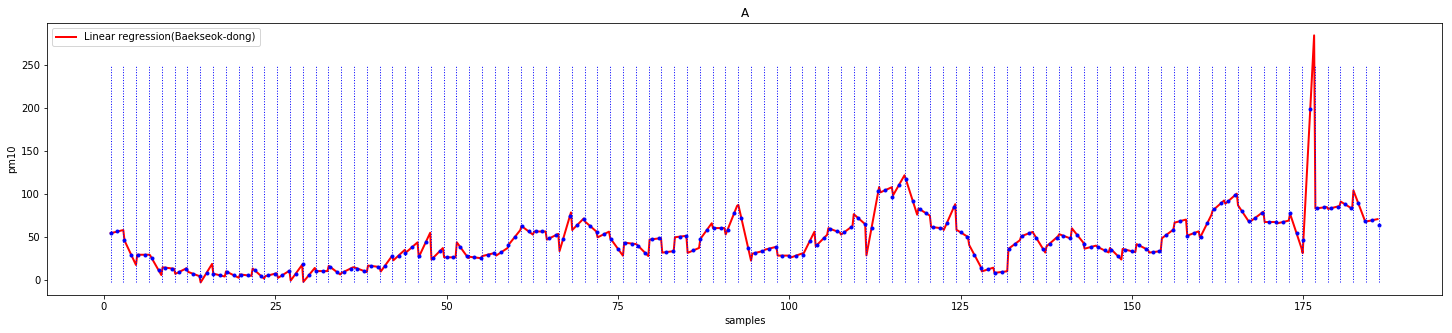

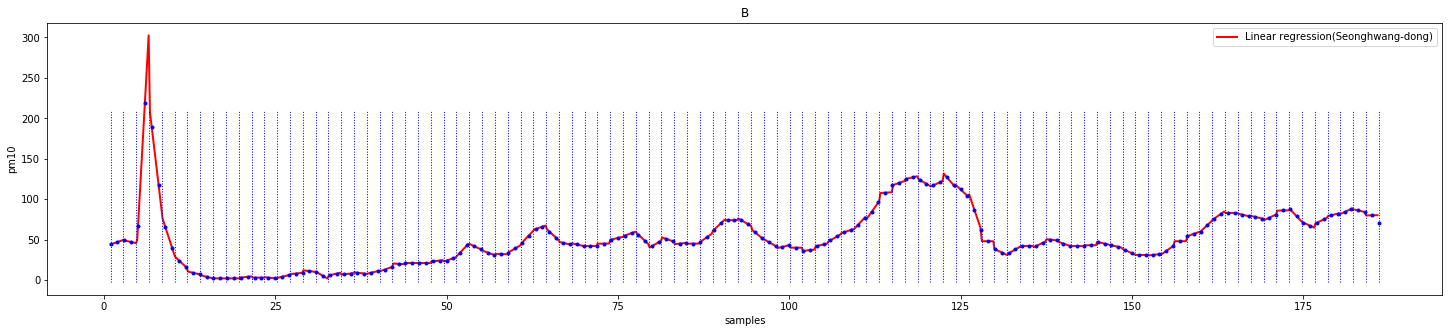

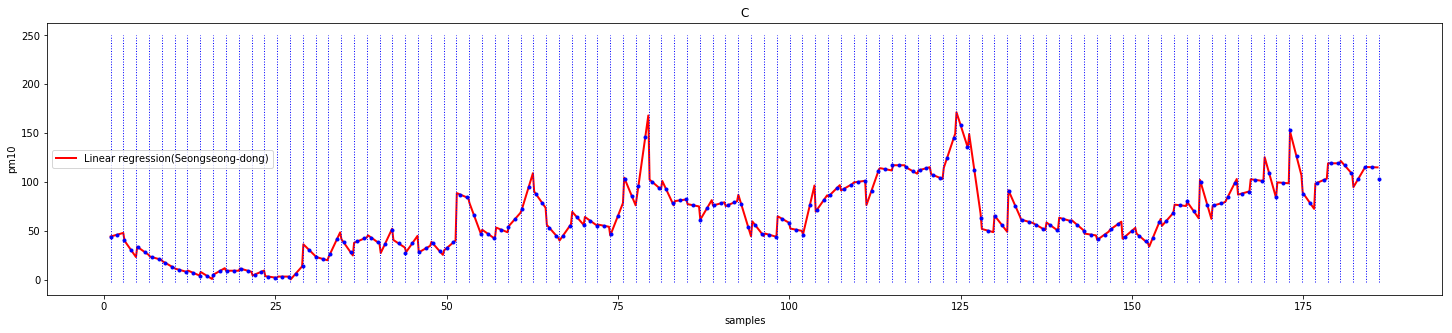

In [9]:
X_product = np.hstack([X_binned, aT * X_binned])


plt.figure(figsize=(25, 5))

reg = LinearRegression().fit(X_product, b)
line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='Linear regression(Baekseok-dong)', c='r')

for bin in bins:
    plt.plot([bin, bin], [-3, 250], ':', c='b', linewidth=1)
    
#print(X_product[251], b[251])
#plt.plot(aT[251],b[251], '^', c='g')

#for i in range(699):
#    if b[i] == 54.0:
#        print(i)
    
plt.plot(aT[:, 0], b, '.', c='b')
plt.ylabel("pm10")
plt.xlabel("samples")
plt.title("A")
plt.legend(loc="best")




plt2.figure(figsize=(25, 5))

reg2 = LinearRegression().fit(X_product, c)
line_product = np.hstack([line_binned, line * line_binned])
plt2.plot(line, reg2.predict(line_product), label='Linear regression(Seonghwang-dong)', c='r')

for bin in bins:
    plt2.plot([bin, bin], [-3, 210], ':', c='b', linewidth=1)
    
#print(X_product[251], c[251])
#plt.plot(aT[251],c[251], '^', c='g')

#for i in range(699):
#    if c[i] == 58.0:
#        print(i)
        
    
plt2.plot(aT[:, 0], c, '.', c='b')
plt2.ylabel("pm10")
plt2.xlabel("samples")
plt2.title("B")
plt2.legend(loc="best")




plt3.figure(figsize=(25, 5))

reg3 = LinearRegression().fit(X_product, d)
line_product = np.hstack([line_binned, line * line_binned])
plt3.plot(line, reg3.predict(line_product), label='Linear regression(Seongseong-dong)', c='r')

for bin in bins:
    plt3.plot([bin, bin], [-3, 250], ':', c='b', linewidth=1)
    
    
    
plt3.plot(aT[:, 0], d, '.', c='b')
plt3.ylabel("pm10")
plt3.xlabel("samples")
plt3.title("C")
plt3.legend(loc="best")

X.shape: (186, 1)
X_poly.shape: (186, 14)
Entries of X:
[[1.]
 [2.]
 [3.]
 [4.]
 [5.]]
Entries of X_poly:
[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00
  1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
  1.280e+02 2.560e+02 5.120e+02 1.024e+03 2.048e+03 4.096e+03 8.192e+03]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01 2.430e+02 7.290e+02
  2.187e+03 6.561e+03 1.968e+04 5.905e+04 1.771e+05 5.314e+05 1.594e+06]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02 1.024e+03 4.096e+03
  1.638e+04 6.554e+04 2.621e+05 1.049e+06 4.194e+06 1.678e+07 6.711e+07]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02 3.125e+03 1.562e+04
  7.812e+04 3.906e+05 1.953e+06 9.766e+06 4.883e+07 2.441e+08 1.221e+09]]
Polynomial feature names:
['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10', 'x0^11', 'x0^12', 'x0^13']


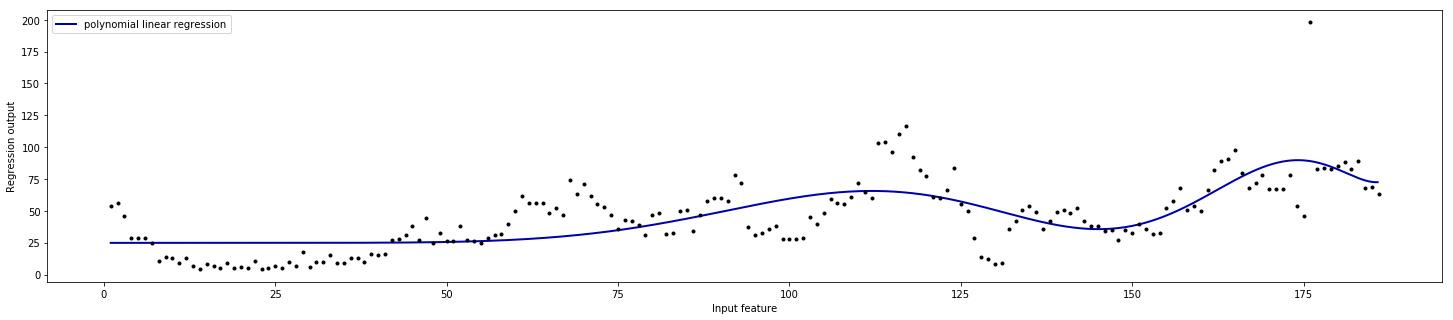

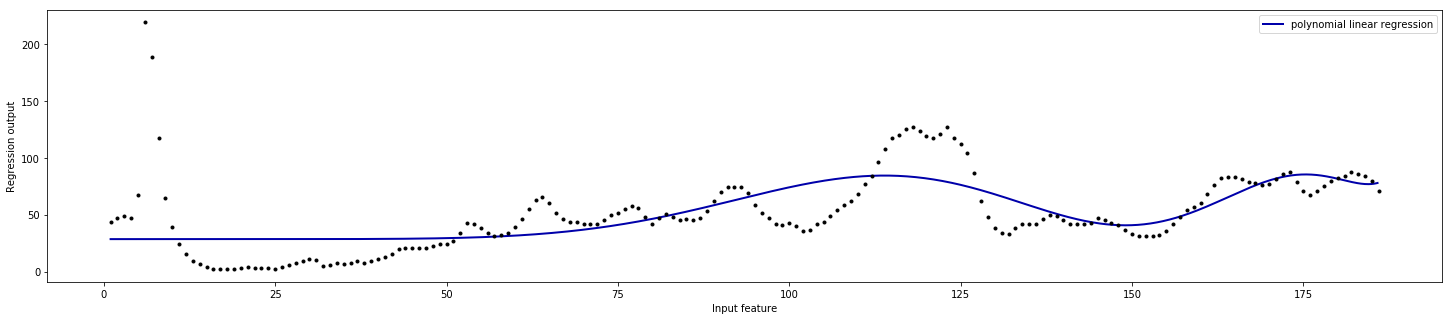

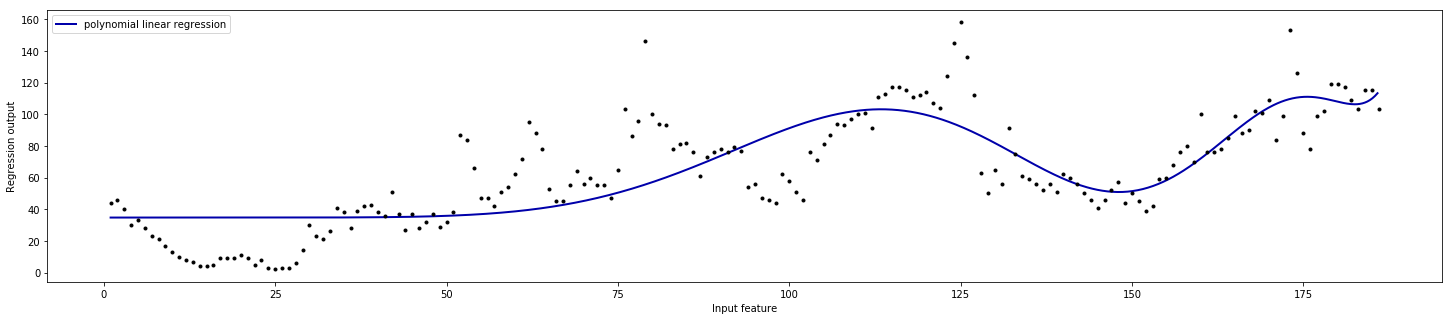

In [10]:
from sklearn.preprocessing import PolynomialFeatures

# include polynomials up to x ** 10:
# the default "include_bias=True" adds a feature that's constantly 1
poly = PolynomialFeatures(degree=13, )
poly.fit(aT)
X_poly = poly.transform(aT)

print("X.shape: {}".format(aT.shape))
print("X_poly.shape: {}".format(X_poly.shape))

print("Entries of X:\n{}".format(aT[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))

print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

plt.figure(figsize=(25, 5))

reg = LinearRegression().fit(X_poly, b)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(aT[:, 0], b, '.', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")



poly = PolynomialFeatures(degree=13, )
poly.fit(aT)
X_poly = poly.transform(aT)

plt.figure(figsize=(25, 5))

reg = LinearRegression().fit(X_poly, c)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(aT[:, 0], c, '.', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")



poly = PolynomialFeatures(degree=13, )
poly.fit(aT)
X_poly = poly.transform(aT)

plt.figure(figsize=(25, 5))

reg = LinearRegression().fit(X_poly, d)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(aT[:, 0], d, '.', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

# ---------------------------------------
### 할것. 릿지, svm Test + 특성 변화 해봐야함